# **SWSN project. Fake News detection and correction - dataset analysis** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
import spacy
import re


nlp = spacy.load("es_core_news_sm")

def preprocess_spanish(text):
    """
    Preprocess Spanish text:
    - lowercase
    - remove digits
    - tokenize
    - remove stopwords
    - lemmatize
    - keep alphabetic tokens only
    """
    text = text.lower()
    text = re.sub(r"\d+", "", text)

    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    
    return " ".join(tokens)


In [5]:
df = pd.read_csv("data.csv", encoding="latin-1")

X = df["TEXT"]
y = df["CATEGORY"]

label_counts = y.value_counts()

print("Label distribution:")
print(label_counts)

print("\nFake news (0):", label_counts.get(0, 0))
print("True news (1):", label_counts.get(1, 0))

Label distribution:
CATEGORY
1    286
0    286
Name: count, dtype: int64

Fake news (0): 286
True news (1): 286


In [9]:
X = X.apply(preprocess_spanish)
CountVec = CountVectorizer(ngram_range=(1,1))
CountData = CountVec.fit_transform(X)

count_data = pd.DataFrame(CountData.toarray(), columns=CountVec.get_feature_names_out())
count_data
# df.to_csv("count_data.csv", index=False)

,aache,aaium,aaiún,aar,abad,abadar,abadés,abajo,abalanzar,abanderado,...,óscar,óvulo,úlcero,últimamente,ún,únicamente,único,útero,útil,úyltimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# USE THIS CODE TO LOAD CSV IN CHUNKS IF NEEDED
#
# count_data = None
# chunksize = 1_000 # adjustable
# for chunk in pd.read_csv('count_data.csv', chunksize=chunksize, index_col=0):
#     if count_data is None:
#         count_data = chunk
#     else:
#         count_data = pd.concat([count_data, chunk], ignore_index=True)
#     print(len(count_data))

## **a) Most frequent words** ##

In [10]:
word_totals = count_data.sum(axis=0)
words_totals_true = count_data[y == 1].sum(axis=0)
words_totals_fake = count_data[y == 0].sum(axis=0)

total_terms = count_data.values.sum()
print(f"Total number of terms in the collection: {total_terms}")
print(f"Total number of different terms in the collection: {count_data.shape[1]}")
print()

most_frequent_words = word_totals.sort_values(ascending=False).head(10)
print("Most frequent words across ALL articles:")
print(most_frequent_words)

most_frequent_words_true = words_totals_true.sort_values(ascending=False).head(10)
print("Most frequent words across TRUE articles:")
print(most_frequent_words_true)
print(f"Total number of terms in the TRUE  collection: {total_terms}")
print()

most_frequent_words_fake = words_totals_fake.sort_values(ascending=False).head(10)
print("Most frequent words across FAKE articles:")
print(most_frequent_words_fake)

Total number of terms in the collection: 119405
Total number of different terms in the collection: 16865

Most frequent words across ALL articles:
país           601
persona        538
virus          512
gobierno       478
caso           464
salud          400
mujer          357
coronavirus    352
vacuna         332
público        299
dtype: int64
Most frequent words across TRUE articles:
país           428
persona        359
gobierno       297
caso           296
salud          283
virus          257
coronavirus    213
mujer          210
enfermedad     207
público        196
dtype: int64
Total number of terms in the TRUE  collection: 119405

Most frequent words across FAKE articles:
virus          255
gobierno       181
persona        179
país           173
caso           168
mujer          147
vacuna         140
coronavirus    139
mundo          125
salud          117
dtype: int64


## **b) Histogram of Term Frequencies** ##

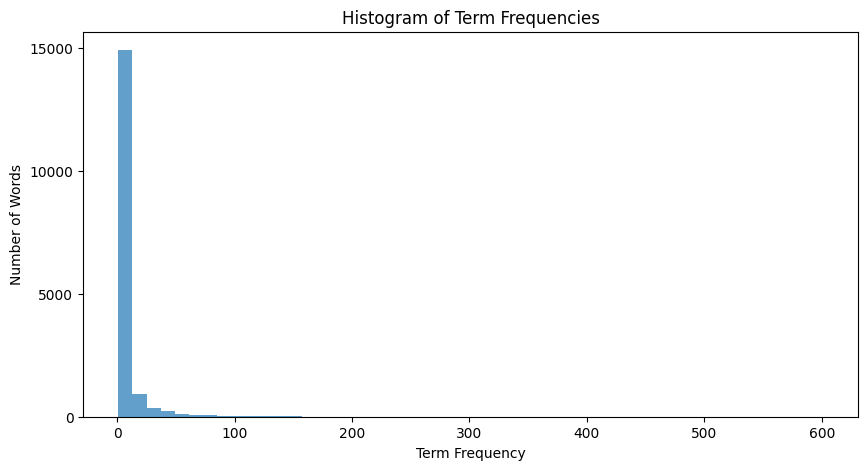

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(word_totals, bins=50, alpha=0.7)
plt.title("Histogram of Term Frequencies")
plt.xlabel("Term Frequency")
plt.ylabel("Number of Words")
plt.yticks(range(0, 20000, 5000))
plt.show()

From this histogram and above analysis we see that most words appear very few times. There are about 15 000 (out of 16 000 unique words) that appears less than ~20 (1046/50) times - likely just once or twice. Then there are few bins of terms that are little common. The long low tail of high frequency words indicates that the number of more frequent words is extrimely low. <br>
To see if our thesis reagarding appearing once or twice is correct lets zoom on x-axis.

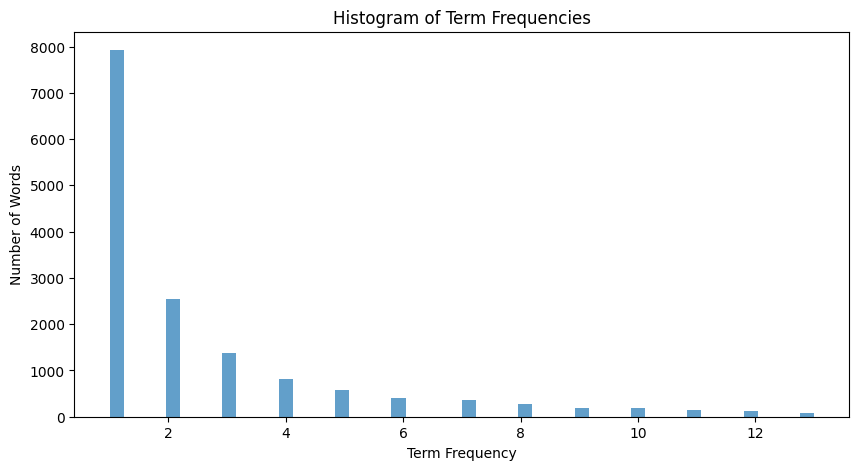

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(word_totals.sort_values().head(15000), bins=50, alpha=0.7)
plt.title("Histogram of Term Frequencies")
plt.xlabel("Term Frequency")
plt.ylabel("Number of Words")
plt.show()

In [13]:
len(word_totals[word_totals < 3])

10473

Now we see 15 000 of the least frequent terms and in fact most of them (about 10k) appears once or twice. That's typical for natural languages.
## **c) Document length distribution**

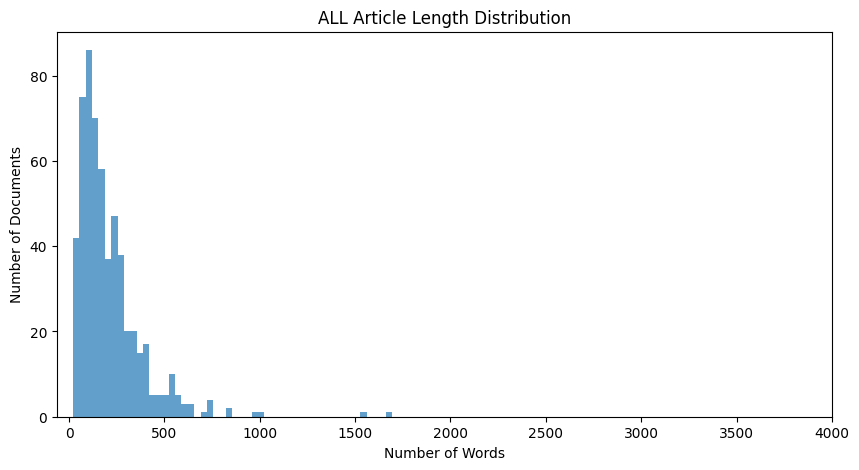

In [14]:
document_lengths = count_data.sum(axis=1)

plt.figure(figsize=(10, 5))
plt.hist(document_lengths, bins=50, alpha=0.7)
plt.title("ALL Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Documents")
plt.xticks(range(0, 4500, 500))
plt.show()

Almost all articles are no longer than ~700 words (after preprocessing). Let's see if there is some significant difference in this distiribution across true and fake articles. <br>

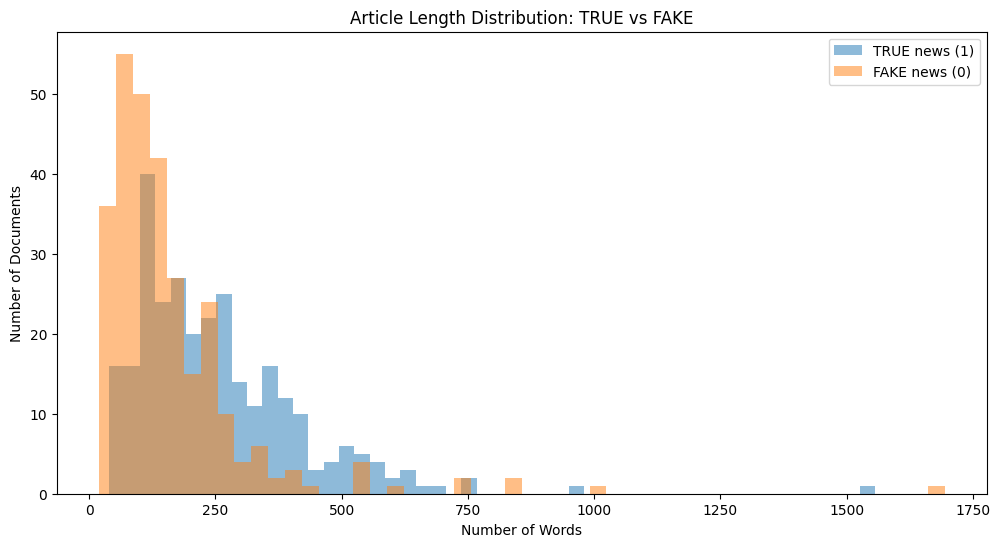

In [15]:
import matplotlib.pyplot as plt

true_lengths = count_data[y == 1].sum(axis=1)
fake_lengths = count_data[y == 0].sum(axis=1)

plt.figure(figsize=(12, 6))

plt.hist(true_lengths, bins=50, alpha=0.5, label="TRUE news (1)")
plt.hist(fake_lengths, bins=50, alpha=0.5, label="FAKE news (0)")

plt.title("Article Length Distribution: TRUE vs FAKE")
plt.xlabel("Number of Words")
plt.ylabel("Number of Documents")
plt.legend()
plt.show()

We see that fake articles in general tend to be shorter than true ones.
## **d) Similarities between articles**

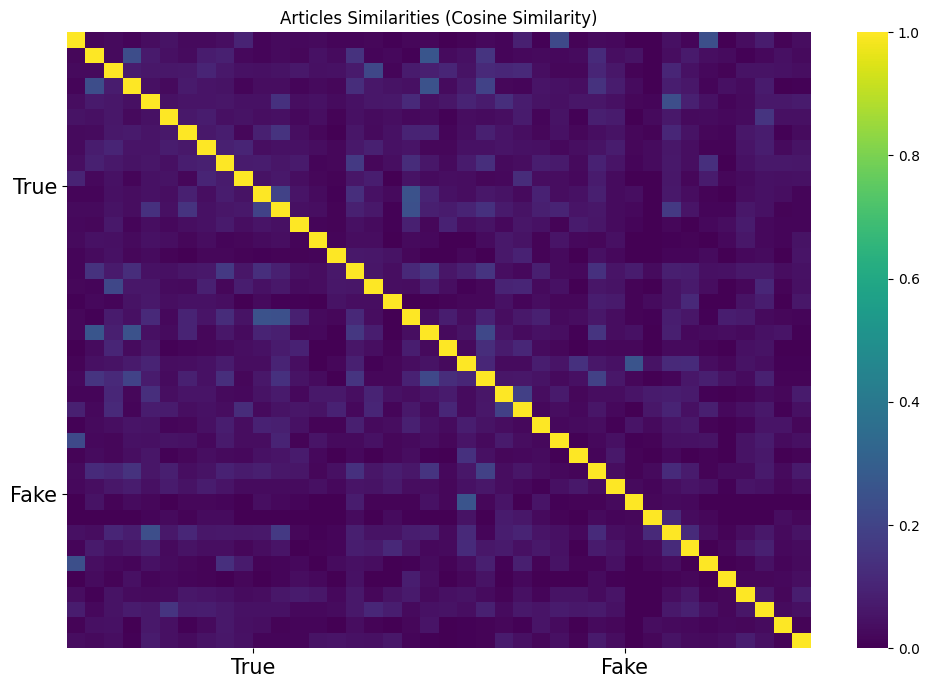

In [16]:
count_data_true = count_data[y == 1]
count_data_fake = count_data[y == 0]

true_sample = count_data_true.sample(n=20, random_state=42)
fake_sample = count_data_fake.sample(n=20, random_state=42)

similarity_matrix = cosine_similarity(pd.concat((true_sample, fake_sample)))

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, cmap="viridis", xticklabels=False, yticklabels=False)
plt.xticks([10, 30], ['True', 'Fake'], size=15)
plt.yticks([10, 30], ['True', 'Fake'], size=15)
plt.title("Articles Similarities (Cosine Similarity)")
plt.show()

When comparing articles using only word-count features, the cosine-similarity heatmap shows no clear separation between true and fake news. Both groups use largely overlapping vocabulary, especially when discussing the same political or social topics. Because bag-of-words ignores meaning and only counts word frequencies, the representations of true and fake articles end up being very similar. As a consequence:
 * True vs True and
 * Fake vs Fake and
 * True vs Fake

pairs all exhibit similarly low, noisy similarity values with no noticeable clusters or structure in the heatmap.

This confirms that simple lexical features cannot reliably distinguish real and false information—fake news intentionally mimics the vocabulary of real news, making them lexically alike.

Since word-level similarity fails to separate fake from true articles, using LLM-based semantic reasoning, as in MUSE, is essential for effective fake-news detection and correction.